# **PYTHON WEB SCRAPING PROJECT**
### SCRAPING MOVIES WEBSITE
1. For this project i have used imdb website
2. Using BeautifulSoup extracted datas from the website
3. Used the Extracted data for Anlysing and Visualization


In [ ]:
#Installing required files

!pip install requests
!pip install bs4

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
source=requests.get('https://www.imdb.com/chart/top/')

In [ ]:
soup=BeautifulSoup(source.text,'html.parser')

In [ ]:
movie=soup.find('tbody',class_="lister-list").find_all('tr')

In [ ]:
#Creating empty list for Storing values

Name=[]
Rank=[]
Year=[]
Rating=[]

#Using for loop iteration to access all values and saving it in empty list

for i in movie:
  name=i.find('td',class_='titleColumn').a.text
  Name.append(name)
  rank=i.find('td',class_='titleColumn').get_text(strip=True).split('.')[0]
  Rank.append(rank)
  year=i.find('td',class_='titleColumn').span.text.strip("()")
  Year.append(year)
  rating=i.find('td',class_='ratingColumn imdbRating').strong.text
  Rating.append(rating)



In [ ]:
import pandas as pd


In [ ]:
#loading the values into the datatable

dict={'Name':Name,'Rank':Rank,'Year':Year,'Rating':Rating}
Top_Movies=pd.DataFrame(dict)
Top_Movies.head()

,Name,Rank,Year,Rating
0,The Shawshank Redemption,1,1994,9.2
1,The Godfather,2,1972,9.2
2,The Dark Knight,3,2008,9.0
3,The Godfather Part II,4,1974,9.0
4,12 Angry Men,5,1957,8.9


In [ ]:
#Saving the Dataset as CSV

Top_Movies.to_csv('TopMovies.csv')

# PERFORMING ANALYSIS AND VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
#Displaying dataset

Top_Movies.head()

,Name,Rank,Year,Rating
0,The Shawshank Redemption,1,1994,9.2
1,The Godfather,2,1972,9.2
2,The Dark Knight,3,2008,9.0
3,The Godfather Part II,4,1974,9.0
4,12 Angry Men,5,1957,8.9


In [ ]:
#Checking for Null values and Dtype

Top_Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    250 non-null    object
 1   Rank    250 non-null    object
 2   Year    250 non-null    object
 3   Rating  250 non-null    object
dtypes: object(4)
memory usage: 7.9+ KB


In [ ]:
#Changing Datatypes

Top_Movies[['Rank','Year','Rating']]=Top_Movies[['Rank','Year','Rating']].astype('float')
Top_Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    250 non-null    object 
 1   Rank    250 non-null    float64
 2   Year    250 non-null    float64
 3   Rating  250 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [ ]:
#Total number of top movies releases in 2008
#For this we use gropuby and count

Total=Top_Movies.groupby(by='Year')['Year'].get_group(2008).count()
print(Total)

3


In [ ]:
#Total no. of Top movies Between 2000-2015
#Using Query function to get between values

Top_Movies.query('2000<=Year<=2015').sort_values(by='Year',ascending=True).count()['Name']

74

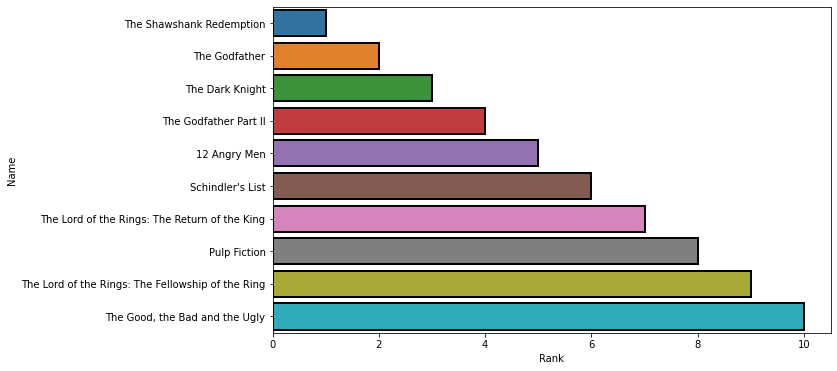

In [ ]:
#Displaying top 10 Movies by Rank
#its already in rank wise

fig=plt.figure(figsize=(10,6))
ax=sns.barplot(data=Top_Movies[:10],x='Rank',y='Name',linewidth=2,edgecolor='black')

Insight:
1. Graph shows Top Movies According to Rank wise:

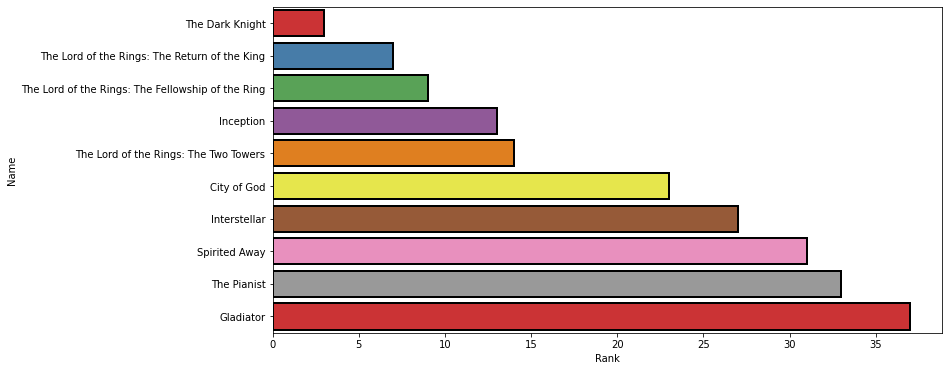

In [ ]:
#Plot Top 10 Movies between 2000-2015

Top_10=Top_Movies.query('2000<=Year<=2015').sort_values(by='Rank',ascending=True)
fig=plt.figure(figsize=(12,6))
ax=sns.barplot(data=Top_10[:10],y='Name',x='Rank',linewidth=2,edgecolor='black',palette='Set1')

Observation:
1. The Dark Knight which is Rank 3 Released in 2008